In [1]:
import spot, buddy
spot.setup()

Additional testing for synthesis

Testing the different methods to solve

In [2]:
si = spot.synthesis_info()
si.s = spot.synthesis_info.algo_LAR # Use LAR algorithm
game = spot.ltl_to_game("G((F(i0) && F(i1))->(G(i1<->(X(o0)))))", ["o0"], si)
spot.solve_game(game)

True

In [3]:
si.minimize_lvl = 0
mm0 = spot.solved_game_to_mealy(game, si)
msep0 = spot.solved_game_to_separated_mealy(game, si)
msplit0 = spot.solved_game_to_split_mealy(game, si)
assert(spot.is_mealy(mm0))
assert(spot.is_separated_mealy(msep0))
assert(spot.is_split_mealy(msplit0))
print(mm0.to_str("hoa"))
print(msep0.to_str("hoa"))
print(msplit0.to_str("hoa"))
si.minimize_lvl = 2
mm2 = spot.solved_game_to_mealy(game, si)
msep2 = spot.solved_game_to_separated_mealy(game, si)
msplit2 = spot.solved_game_to_split_mealy(game, si)
assert(spot.is_mealy(mm2))
assert(spot.is_separated_mealy(msep2))
assert(spot.is_split_mealy(msplit2))
print(mm2.to_str("hoa"))
print(msep2.to_str("hoa"))
print(msplit2.to_str("hoa"))
si.minimize_lvl = 3
mm3 = spot.solved_game_to_mealy(game, si)
msep3 = spot.solved_game_to_separated_mealy(game, si)
msplit3 = spot.solved_game_to_split_mealy(game, si)
assert(spot.is_mealy(mm3))
assert(spot.is_separated_mealy(msep3))
assert(spot.is_split_mealy(msplit3))
print(mm3.to_str("hoa"))
print(msep3.to_str("hoa"))
print(msplit3.to_str("hoa"))

HOA: v1
States: 21
Start: 0
AP: 3 "i1" "i0" "o0"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
spot-state-player: 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1
controllable-AP: 2
--BODY--
State: 0
[!0&!1] 2
[!0&1] 4
[0&!1] 6
[0&1] 8
State: 1
[0&1] 13
[0&!1] 18
[!0&1] 19
[!0&!1] 20
State: 2
[t] 1
State: 3
[0] 13
[!0] 19
State: 4
[t] 3
State: 5
[!0&1] 10
[0&1] 11
[!0&!1] 15
[0&!1] 16
State: 6
[t] 5
State: 7
[!0] 10
[0] 11
State: 8
[t] 7
State: 9
[!0] 12
[0] 13
State: 10
[2] 9
State: 11
[2] 7
State: 12
[!2] 9
State: 13
[!2] 7
State: 14
[!0&1] 12
[0&1] 13
[!0&!1] 17
[0&!1] 18
State: 15
[2] 14
State: 16
[2] 5
State: 17
[!2] 14
State: 18
[!2] 5
State: 19
[!2] 3
State: 20
[!2] 1
--END--
HOA: v1
States: 7
Start: 0
AP: 3 "i1" "i0" "o0"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 2
--BODY--
State: 0
[!0&!1] 1
[!0&1] 2
[0&!1] 3
[0&1] 4
State: 1
[0&1&!2] 4
[0&!1&!2] 3
[!0&1&!2] 2
[!0&!1

In [4]:
mus0 = spot.unsplit_mealy(msplit0)
mus2 = spot.unsplit_mealy(msplit2)
mus3 = spot.unsplit_mealy(msplit3)

In [5]:
assert(mus0.equivalent_to(msep0))

In [6]:
assert(mus2.equivalent_to(msep2))

In [7]:
assert(mus3.equivalent_to(msep3))

Testing related to #495

(0, t)


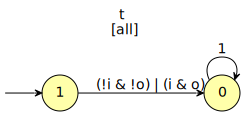

In [8]:
a = spot.translate("i<->o", "parity")
print(a.acc())
a

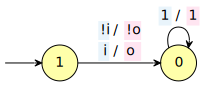

In [9]:
spot.set_synthesis_outputs(a, buddy.bdd_ithvar(a.register_ap("o")))
a

(0, t)


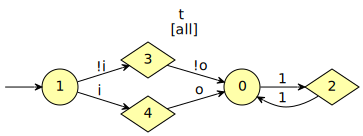

In [10]:
a_s = spot.split_2step(a, True)
print(a.acc())
a_s

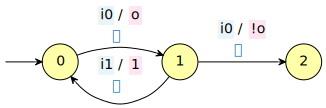

In [11]:
a = spot.make_twa_graph()
a.acc().set_acceptance(spot.acc_code.t())
i0 = buddy.bdd_ithvar(a.register_ap('i0'))
i1 = buddy.bdd_ithvar(a.register_ap('i1'))
o = buddy.bdd_ithvar(a.register_ap('o'))
tt = buddy.bddtrue
a0 = spot.mark_t([0])
a.new_states(3)
a.new_edge(0,1,i0&o,a0)
a.new_edge(1,0,i1,a0)
a.new_edge(1,2,i0&(buddy.bdd_not(o)),a0)
spot.set_synthesis_outputs(a, o)
a

(0, t)


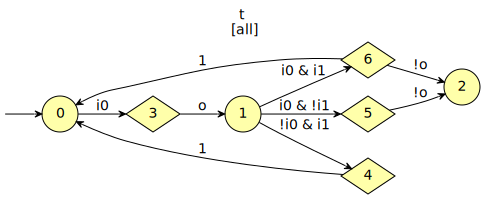

In [12]:
a_snc = spot.split_2step(a, False)
print(a_snc.acc())
a_snc

(1, Fin(0))


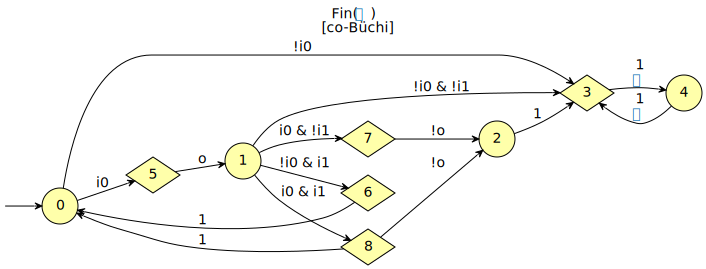

In [13]:
a_s = spot.split_2step(a, True)
print(a_s.acc())
a_s